# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxide concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [2]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# Import csv file to work with
df = pd.read_csv('train.csv')
df.tail()
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [4]:
# Explore centrality/dispersion for 'crim'
mean_crime = round(df.crim.mean(), 2)
median_crime = round(df.crim.median(), 2)
std_crime = round(df.crim.std(), 2)

print(f'The mean crime rate is {mean_crime} per capita.')
print(f'The median crime rate is {median_crime} per capita.')
print(f'The crime rate standard deviation is {std_crime} per capita.')

The mean crime rate is 3.36 per capita.
The median crime rate is 0.26 per capita.
The crime rate standard deviation is 7.35 per capita.


In [5]:
# Explore centrality/dispersion for 'age' (propoertion of owner-occupied units constructed before 1940)
mean_age = round(df.age.mean(), 1)
median_age = round(df.age.median(), 1)
std_age = round(df.age.std(), 1)

print(f'The mean age is {mean_age}.')
print(f'The median age is {median_age}.')
print(f'The age standard deviation is {std_age}.')

The mean age is 68.2.
The median age is 76.7.
The age standard deviation is 28.1.


In [6]:
# Explore centrality/dispersion for 'rm, a.k.a. # of rooms per dwelling'
mean_rm = round(df.rm.mean(), 2)
median_rm = round(df.rm.median(), 2)
std_rm = round(df.rm.std(), 2)

print(f'The mean rooms per dwelling is {mean_rm}.')
print(f'The median rooms per dwelling is {median_rm}.')
print(f'The rooms per dwelling standard deviation is {std_rm}.')

The mean rooms per dwelling is 6.27.
The median rooms per dwelling is 6.2.
The rooms per dwelling standard deviation is 0.7.


## First Subsets: Split data by whether tract is on charles river
#### No centrality or dispersion this specific variable, since it is a 'dummy', yes/no variable

In [7]:
df_charles_y = df[df.chas == 1]
df_charles_y
df_charles_n = df[df.chas == 0]
df_charles_n

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


## Second Subsets: Split data by accessibility to radial highways, <= 5 index value
### Dispersion of the >5 rad subset should be higher than in the <=5 subset, since there are less index value options at the lower end

In [8]:
df_rad_high = df[df.rad > 5]
df_rad_high
df_rad_low = df[df.rad <= 5]
df_rad_low

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


## Third Subsets: Split data by rm (avg. rooms per dwelling) <= 6.2
#### I think dispersion will be higher for the greater subset, since some wealthy towns will average much more than six rooms

In [9]:
df_rm_high = df[df.rm > 6.2]
df_rm_high
df_rm_low = df[df.rm <= 6.2]
df_rm_low

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
10,16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
11,17,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
13,21,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
14,22,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6


# Subset 1 Plots: Vicinity to Charles River

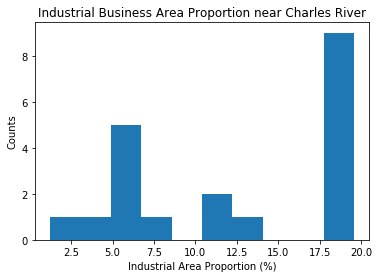

In [10]:
# Plot histogram of non-retail (industrial) business area for places near Charles River
plt.hist(df_charles_y['indus'])
plt.title('Industrial Business Area Proportion near Charles River')
plt.xlabel('Industrial Area Proportion (%)')
plt.ylabel('Counts')
plt.show()

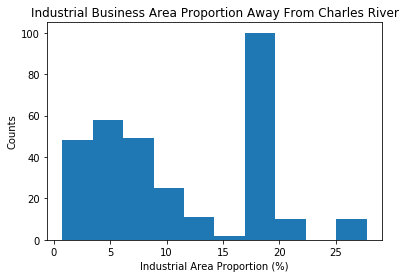

In [11]:
# Plot histogram of non-retail (industrial) business area for places not near Charles River
plt.hist(df_charles_n['indus'])
plt.title('Industrial Business Area Proportion Away From Charles River')
plt.xlabel('Industrial Area Proportion (%)')
plt.ylabel('Counts')
plt.show()

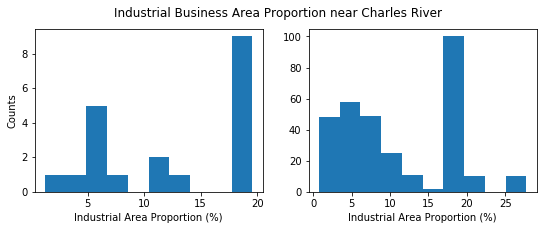

In [12]:
# Both Subset 1 Plots together
plt.figure(figsize = (9,3))
plt.subplot(121)
plt.hist(df_charles_y['indus'])
plt.suptitle('Industrial Business Area Proportion near Charles River')
plt.xlabel('Industrial Area Proportion (%)')
plt.ylabel('Counts')
plt.subplot(122)
plt.hist(df_charles_n['indus'])
plt.xlabel('Industrial Area Proportion (%)')
plt.show()


# Subplots 2: Accessibility to Radial Highways vs. Crime Rate

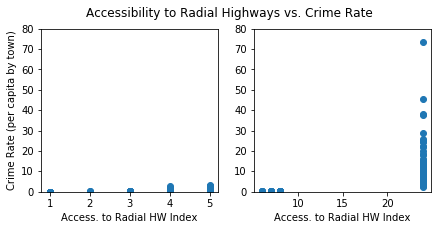

In [21]:
# Histogram subplot of Accessibility to radial highways, total, and above/below 5

plt.figure(figsize = (7,3))
plt.subplot(122)
plt.suptitle('Accessibility to Radial Highways vs. Crime Rate')
plt.scatter(df_rad_high['rad'], df_rad_high['crim'])
plt.ylim(0,80)
plt.xlabel('Access. to Radial HW Index')
plt.subplot(121)
plt.scatter(df_rad_low['rad'], df_rad_low['crim'])
plt.ylim(0,80)
plt.ylabel('Crime Rate (per capita by town)')
plt.xlabel('Access. to Radial HW Index')
plt.show()

#### Crime rate seems to increase dramatically at highest Access to Radial Highway Index!

# Subset 3: Average rooms per dwelling (<= or > 6.2)

### Creating scatter plots of median values of owner-occupied homes vs. rooms per dwelling. I expect to see a correlation between these two variables.

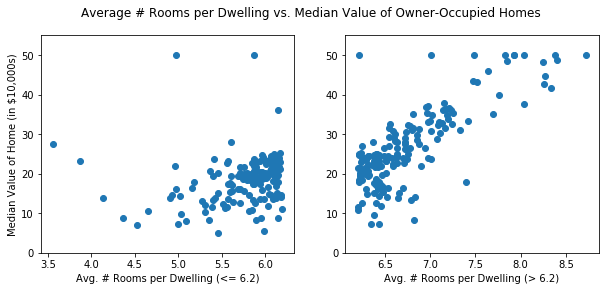

In [27]:
plt.figure(figsize = (10,4))
plt.subplot(122)
plt.suptitle('Average # Rooms per Dwelling vs. Median Value of Owner-Occupied Homes')
plt.scatter(df_rm_high['rm'], df_rm_high['medv'])
plt.ylim(0,55)
plt.xlabel('Avg. # Rooms per Dwelling (> 6.2)')
plt.subplot(121)
plt.scatter(df_rm_low['rm'], df_rm_low['medv'])
plt.ylim(0,55)
plt.ylabel('Median Value of Home (in $10,000s)')
plt.xlabel('Avg. # Rooms per Dwelling (<= 6.2)')
plt.show()

#### Certainly appears to be a correlation between these two variables for the subset of data with greater than 6.2 avg. rooms. Less of a correlation for subset with less than 6.2 avg. rooms.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!